# Problem statement
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase:

# Data Collection Phase
-> You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. More the data better the model.

-> In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 etc.)

-> You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.

-> Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, Hatchback. Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.

Model Building Phase
-> After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps.

-> Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like:

# Data Cleaning
- Exploratory Data Analysis
- Data Pre-processing
- Model Building
- Model Evaluation
- Selecting the best model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data_Cars.csv')
df

Car Name    Year  Kilometre                   Location       Price
0       Jaguar  2014.0    68,000   Dhyan Chand Sports Colony   15,95,000
1       Jaguar  2021.0    10,000                 Gomti Nagar   74,00,000
2      Hyundai  2012.0   71000.0                       Chowk    3,00,000
3      Hyundai  2020.0    45,000                    Abu Lane    9,60,000
4     Mahindra  2015.0    55,000                    Abu Lane    6,50,000
...        ...     ...        ...                        ...         ...
3589   Hyundai  2015.0   106,656                 Hiland Park   12,95,000
3590    Maruti  2015.0    67,108                 Hiland Park    3,25,000
3591     Honda  2015.0    42,000    Newtown- Action Area III    3,25,001
3592  Mahindra  2017.0    29,000                   Ultadanga    5,25,000
3593   Hyundai  2020.0    93,000                 Manish Pota    2,70,000

[3594 rows x 5 columns]

In [3]:
df.dtypes

Car Name      object
Year         float64
Kilometre     object
Location      object
Price         object
dtype: object

In [4]:
#Checking for missing data
df.isnull().sum()

Car Name     0
Year         0
Kilometre    0
Location     0
Price        0
dtype: int64

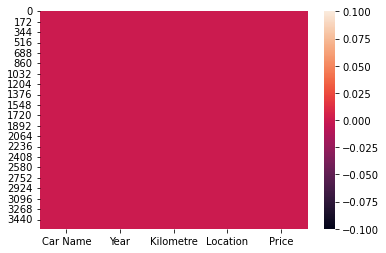

In [5]:
sns.heatmap(df.isnull());

In [6]:
df['Year']=df['Year'].apply(lambda x: int(x))   

In [7]:
try:
    df['Price']=df['Price'].apply(lambda x: x.split(' ')[1] if x!='-' else '0,0')
except IndexError:
    pass

In [8]:
try:
    df['Price']=df['Price'].apply(lambda x: str(x.replace(',', '')))
except ValueError:
    pass

In [9]:
df['Price']=df['Price'].str.strip()

In [10]:
df['Price']=df.Price.astype(float)

In [11]:
try:
    df['Kilometre']=df['Kilometre'].apply(lambda x: str(x.replace(',', '')))
except IndexError:
    pass

In [12]:
df['Kilometre']=df['Kilometre'].str.strip()

In [13]:
df['Kilometre']=df.Kilometre.astype(float)

In [14]:
df['Kilometre'] = df['Kilometre'].fillna(df['Kilometre'].mean())

In [15]:
df.dtypes

Car Name      object
Year           int64
Kilometre    float64
Location      object
Price        float64
dtype: object

In [16]:
df

Car Name  Year  Kilometre                   Location      Price
0       Jaguar  2014    68000.0  Dhyan Chand Sports Colony  1595000.0
1       Jaguar  2021    10000.0                Gomti Nagar  7400000.0
2      Hyundai  2012    71000.0                      Chowk   300000.0
3      Hyundai  2020    45000.0                   Abu Lane   960000.0
4     Mahindra  2015    55000.0                   Abu Lane   650000.0
...        ...   ...        ...                        ...        ...
3589   Hyundai  2015   106656.0                Hiland Park  1295000.0
3590    Maruti  2015    67108.0                Hiland Park   325000.0
3591     Honda  2015    42000.0   Newtown- Action Area III   325001.0
3592  Mahindra  2017    29000.0                  Ultadanga   525000.0
3593   Hyundai  2020    93000.0                Manish Pota   270000.0

[3594 rows x 5 columns]

In [17]:
df['Car Name'].value_counts()

Maruti           1153
Hyundai           630
Mahindra          319
Honda             234
Toyota            200
Tata              184
Ford              127
Volkswagen         97
Renault            82
Mercedes-Benz      78
Chevrolet          76
Skoda              74
BMW                60
Audi               51
Nissan             33
Kia                31
Jeep               19
Fiat               16
Datsun             16
Mitsubishi         14
Land               14
MG                 13
Volvo              11
Jaguar             10
Bajaj               8
Mercedes            7
Mini                6
Force               6
Ssangyong           3
Porsche             3
Other               3
Ashok               2
Isuzu               2
Ambassador          2
Smart               1
Eicher              1
Aston               1
Infiniti            1
Lamborghini         1
Opel                1
Maybach             1
Maserati            1
Mazda               1
Hindustan           1
Name: Car Name, dtype: int64

## Exploratory Data Analysis

### Univariate and Bivariate Analysis

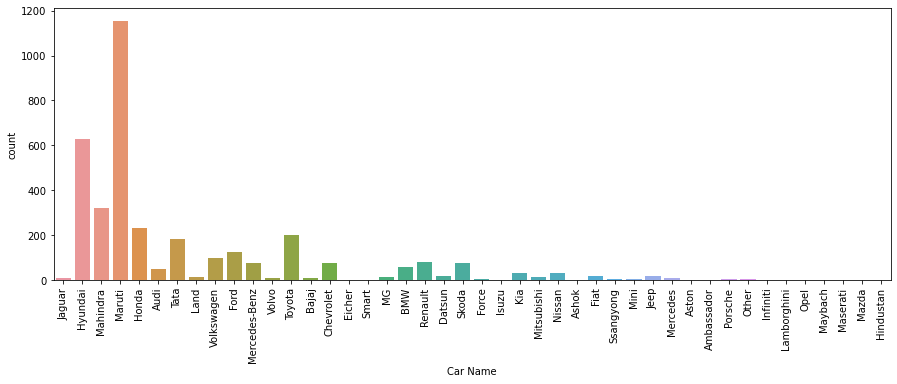

In [18]:
#Plotting the countplot for Car Name
plt.figure(figsize=(15,5))
sns.countplot(df['Car Name'])
plt.xticks(rotation=90)
plt.show()

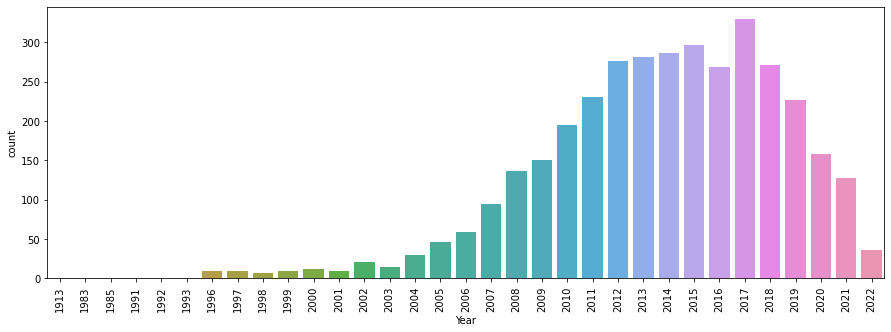

In [19]:
#Plotting the countplot for Car Name
plt.figure(figsize=(15,5))
sns.countplot(df['Year'])
plt.xticks(rotation=90)
plt.show()

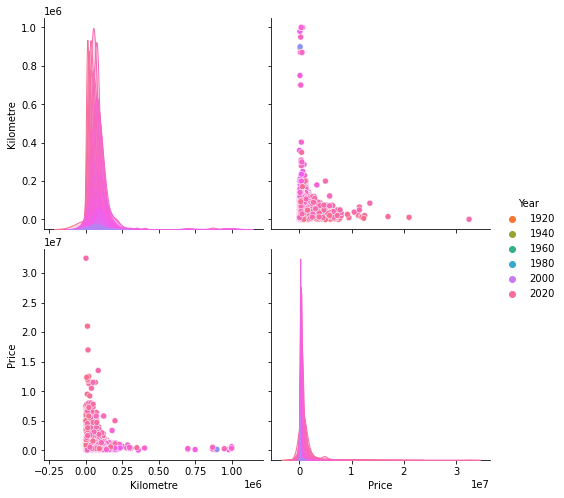

In [20]:
sns.pairplot(df,hue = 'Year',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5) 
plt.show()

In [21]:
df.drop(['Location'],axis=1,inplace=True)

In [22]:
df

Car Name  Year  Kilometre      Price
0       Jaguar  2014    68000.0  1595000.0
1       Jaguar  2021    10000.0  7400000.0
2      Hyundai  2012    71000.0   300000.0
3      Hyundai  2020    45000.0   960000.0
4     Mahindra  2015    55000.0   650000.0
...        ...   ...        ...        ...
3589   Hyundai  2015   106656.0  1295000.0
3590    Maruti  2015    67108.0   325000.0
3591     Honda  2015    42000.0   325001.0
3592  Mahindra  2017    29000.0   525000.0
3593   Hyundai  2020    93000.0   270000.0

[3594 rows x 4 columns]

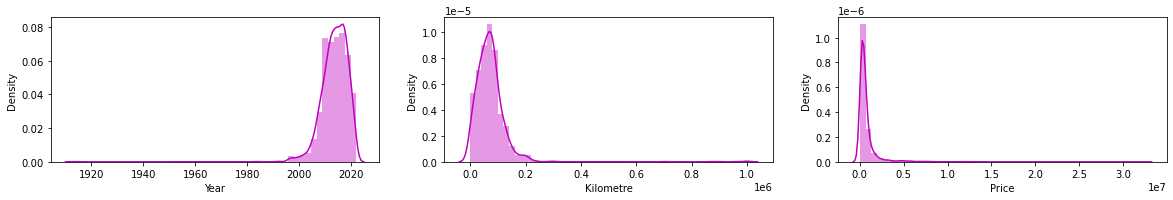

In [23]:
List = ['Year','Kilometre','Price']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in List:
    if plotnumber<=20:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column],color='m')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1;

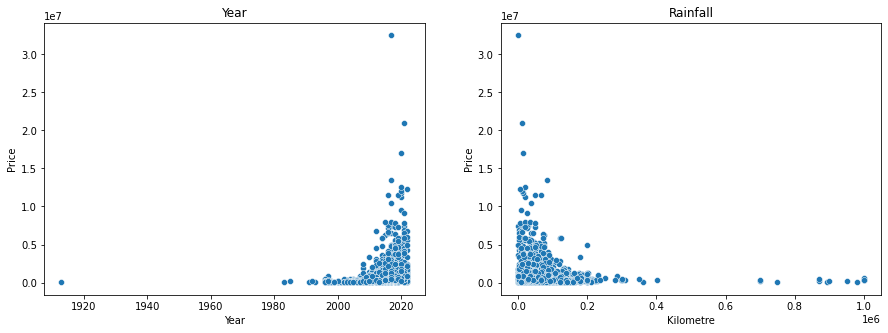

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Year')
sns.scatterplot(x='Year',y='Price',data=df)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Kilometre',y='Price',data=df)
plt.show()

### Statistical

In [25]:
df.describe()

Year      Kilometre         Price
count  3594.000000    3594.000000  3.594000e+03
mean   2013.715081   72573.742552  7.258047e+05
std       5.005209   67457.962843  1.283106e+06
min    1913.000000       0.000000  1.500000e+04
25%    2011.000000   40000.000000  2.450000e+05
50%    2014.000000   67001.500000  4.200000e+05
75%    2017.000000   90000.000000  7.200000e+05
max    2022.000000  999999.000000  3.250000e+07

##### Observations:

1.There is not much difference between the mean and the median

2.The minimum value is 0 for all other columns.

3.The 75th percentile and max value difference for km_driven column is high and it is due to the presence of outliers.

### correlation

In [26]:
corr=df.corr()  
corr

Year  Kilometre     Price
Year       1.000000  -0.263975  0.303587
Kilometre -0.263975   1.000000 -0.129871
Price      0.303587  -0.129871  1.000000

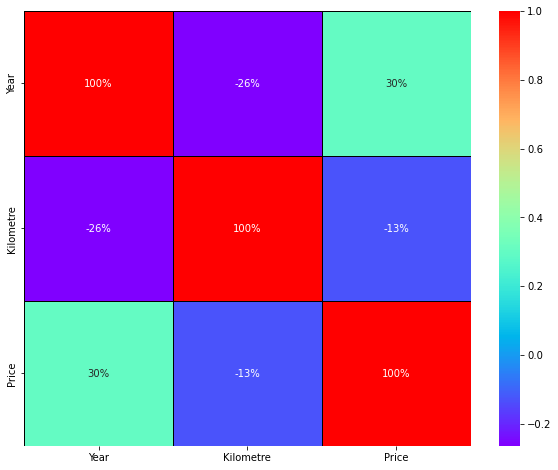

In [27]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

#### Observations:

1.There are more negative correlations present in the dataset

2.Highest positive correlated column has a value of 30%.

3.Highest negatively correlated column has a value of -26%

4.Positively correlated columns have a high impact with the target variable whereas negatively correlated columns have less or zero impact with the target variable.

Text(0.5, 1.0, 'Correlation with Target variable')

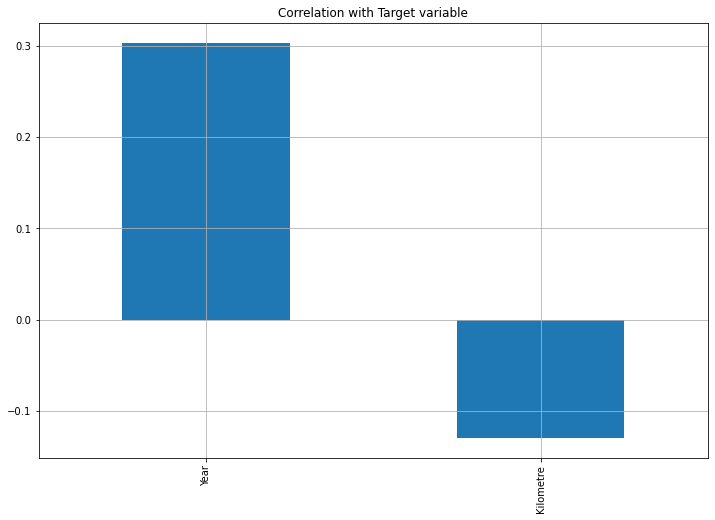

In [28]:
#Correlation with target variable
plt.figure(figsize=(12,8))
df.drop('Price',axis=1).corrwith(df['Price']).plot(kind='bar',grid=True)
plt.title('Correlation with Target variable')

In [29]:
#Dropping name column
df.drop(['Car Name'],axis=1,inplace=True)

### Checking skewness

In [30]:
df.skew()

Year        -2.985356
Kilometre    7.824107
Price        9.136033
dtype: float64

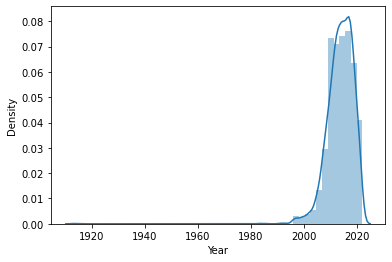

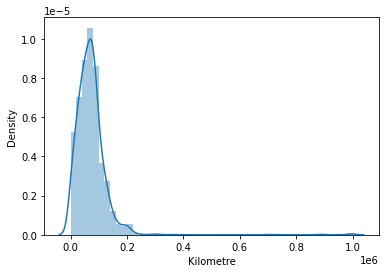

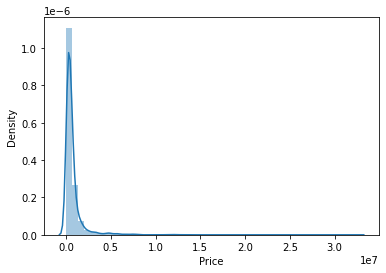

In [31]:
#Plotting distplot for checking the distribution of skewness
for col in df.describe().columns:
    sns.distplot(df[col])
    plt.show()

### Identifying the Outliers

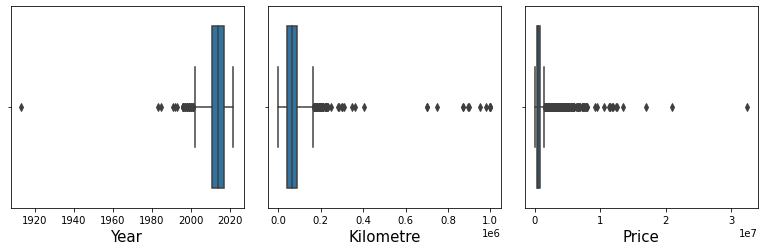

In [32]:
# Identifying the outliers using boxplot
plt.figure(figsize=(25,10),facecolor='white')
plotnumber=1
for column in List:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### z-score

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df))   
threshold=3    
np.where(z>3)

(array([   1,   20,  127,  215,  258,  293,  363,  366,  450,  504,  542,
         601,  611,  612,  613,  618,  622,  719,  738,  760,  800,  810,
         825,  884,  885,  908,  937, 1002, 1014, 1082, 1151, 1191, 1244,
        1341, 1343, 1376, 1403, 1418, 1424, 1498, 1501, 1546, 1574, 1583,
        1594, 1611, 1614, 1621, 1636, 1650, 1670, 1671, 1673, 1691, 1692,
        1694, 1712, 1724, 1731, 1755, 1772, 1773, 1789, 1797, 1801, 1812,
        1848, 1867, 1878, 1880, 1881, 1882, 1893, 1894, 1914, 1929, 1930,
        1945, 1947, 1948, 1959, 1986, 1988, 2027, 2033, 2060, 2062, 2067,
        2082, 2146, 2159, 2161, 2186, 2188, 2191, 2193, 2197, 2206, 2217,
        2253, 2254, 2268, 2284, 2301, 2307, 2347, 2384, 2387, 2402, 2417,
        2434, 2438, 2498, 2593, 2631, 2685, 2692, 2692, 2712, 2758, 2767,
        2795, 2831, 2835, 2889, 2960, 3009, 3019], dtype=int64),
 array([2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 

In [34]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

Year  Kilometre      Price
0     2014    68000.0  1595000.0
2     2012    71000.0   300000.0
3     2020    45000.0   960000.0
4     2015    55000.0   650000.0
5     2020     9500.0   450000.0
...    ...        ...        ...
3589  2015   106656.0  1295000.0
3590  2015    67108.0   325000.0
3591  2015    42000.0   325001.0
3592  2017    29000.0   525000.0
3593  2020    93000.0   270000.0

[3467 rows x 3 columns]

### Data Pre-processing

In [35]:
X =df_new.drop('Price',axis=1)   
Y =df_new['Price']   

In [36]:
for col in X.skew().index:
    if col in X.describe().columns:
        if X[col].skew()>0.55:
            X[col]=np.sqrt(X[col])
        if X[col].skew()<-0.55:
            X[col]=np.sqrt(X[col])  

In [37]:
X.skew()

Year        -0.512683
Kilometre   -0.426659
dtype: float64

### Scaling the data

In [38]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

Year  Kilometre
0     0.042623   0.134656
1    -0.412062   0.201792
2     1.406675  -0.439177
3     0.269965  -0.175023
4     1.406675  -1.792043
...        ...        ...
3462  0.269965   0.911166
3463  0.269965   0.114410
3464  0.269965  -0.524044
3465  0.724649  -0.932805
3466  1.406675   0.656044

[3467 rows x 2 columns]

### Model

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
maxAccu=0
maxRS=0

for i in range(1,200):
    X_train,X_test, Y_train, Y_test=train_test_split(x,Y,test_size=.30, random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(X_train,Y_train)
    predRFR=RFR.predict(X_test)
    acc=r2_score(Y_test,predRFR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.10971341341197594  on Random_state  73


### Train Test Split

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size=.3,random_state=maxRS)

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

LR=LinearRegression()
LR.fit(X_train,Y_train)
# [Prediction]
predLR = LR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLR)))

R2 Score: 0.23748523930071463
Mean Absolute Error 313296.4477060627
Mean Squared Error 272548286641.89282
Root Mean Squared Error 522061.5736116697


### Linear Regression with Ridge

In [42]:
from sklearn.model_selection import GridSearchCV
paramsRidge ={'alpha':[0.01,0.1,1.0,10.26],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 1.0, 'solver': 'saga'}


In [43]:
ridge = Ridge(alpha = 10.26,solver = 'sag')
ridge.fit(X_train,Y_train)
ridge.score(X_train,Y_train)
pred_ridge = ridge.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_ridge))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_ridge))
print('Mean Squared Error',mean_squared_error(Y_test,pred_ridge))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_ridge)))

R2 Score: 0.23728625315158824
Mean Absolute Error 313418.9464122567
Mean Squared Error 272619410948.99496
Root Mean Squared Error 522129.6878640353


### Linear Regression With Lasso

In [44]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [45]:
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(X_train,Y_train)
lasso.score(X_train,Y_train)
pred_lasso = lasso.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_lasso))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(Y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_lasso)))

R2 Score: 0.23748524130089688
Mean Absolute Error 313296.3748377404
Mean Squared Error 272548285926.9608
Root Mean Squared Error 522061.57292694965


### Random Forest Regressor

In [46]:
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)
# [Prediction]
predRFR = RFR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFR)))

R2 Score: 0.10276319568935222
Mean Absolute Error 324733.3270038949
Mean Squared Error 320702452373.0555
Root Mean Squared Error 566305.9706316502


### GradientBoostingRegressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)

# [Prediction]
predGB = GB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGB)))

R2 Score: 0.26527920871454114
Mean Absolute Error 293713.4509057687
Mean Squared Error 262613792081.06815
Root Mean Squared Error 512458.57596596837


### Bagging Regressor

In [48]:
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor()
BR.fit(X_train,Y_train)

# [Prediction]
predBR = BR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predBR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predBR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predBR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predBR)))

R2 Score: 0.07507781551294157
Mean Absolute Error 329022.3048148116
Mean Squared Error 330598133507.3987
Root Mean Squared Error 574976.6373579005


### Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

# [Prediction]
predDTR = DTR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTR)))

R2 Score: -0.1017953123259856
Mean Absolute Error 349184.85281475383
Mean Squared Error 393818506974.3766
Root Mean Squared Error 627549.6051902005


### ExtraTrees Regressor

In [50]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X_train,Y_train)

# [Prediction]
predETR = ETR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETR)))

R2 Score: -0.06444293235305065
Mean Absolute Error 346341.26440011134
Mean Squared Error 380467516687.59937
Root Mean Squared Error 616820.4898409256


### XGB Regressor

In [51]:
from xgboost import XGBRegressor as xgb

xgb=xgb(verbosity=0)
xgb.fit(X_train,Y_train)

# prediction
predxgb=xgb.predict(X_test)
print('R2_Score:',r2_score(Y_test,predxgb))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test, predxgb))

# Mean Squared Error(MSE)
print('Mean Squared Error(MAE)',mean_squared_error(Y_test, predxgb))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE)",np.sqrt(mean_squared_error(Y_test, predxgb)))

R2_Score: 0.13001857923783278
Mean Absolute Error(MAE) 321094.65393101587
Mean Squared Error(MAE) 310960466419.76904
Root Mean Squared Error (RMSE) 557638.2935378174


### KNeighborsRegressor

In [52]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))

R2 Score: 0.16085682306223226
Mean Absolute Error 326499.53006724303
Mean Squared Error 299937846333.46796
Root Mean Squared Error 547665.8162907996


### Cross-Validation

In [53]:
from sklearn.model_selection import cross_val_score

# Checking cv score for Linear Regression
print('Linear Regression -->',cross_val_score(LR,X,Y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print('Random Forest Regressor -->',cross_val_score(RFR,X,Y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print('GradientBoostingRegressor -->',cross_val_score(GB,X,Y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print('BaggingRegressor -->',cross_val_score(BR,X,Y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree Regressor -->',cross_val_score(DTR,X,Y,cv=5).mean())

# Checking cv score for ExtraTrees Regressor
print('ExtraTrees Regressor -->',cross_val_score(ETR,X,Y,cv=5).mean())

# Checking cv score for XGBRegressor
print('XGBRegressor:',cross_val_score(xgb,X,Y,cv=5).mean())

Linear Regression --> 0.20771568641950838
Random Forest Regressor --> -0.07568348502596386
GradientBoostingRegressor --> 0.18694807081869938
BaggingRegressor --> -0.10776755032784927
Decision Tree Regressor --> -0.37664988775994585
ExtraTrees Regressor --> -0.29151632806982947
XGBRegressor: -0.048261026927012285


Based on the model score and the cross val score we have found that XGB Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

### Hyper Parameter tuning

In [54]:
parameters = {'n_estimators' : [50,100,200, 400],
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10],
              'n_jobs' : [-2, -1, 1]}

In [57]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(xgb,parameters,cv=5)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 200, 400],
                         'n_jobs': [-2, -1, 1]})

In [58]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 4, 'n_estimators': 50, 'n_jobs': -2}

In [62]:
from xgboost import XGBRegressor as xgb
Car = xgb(gamma=0.0, max_depth=4, n_estimators=400, n_jobs=-2)
Car.fit(X_train, Y_train)

# prediction
predCar=Car.predict(X_test)
print('R2_Score:',r2_score(Y_test,predCar)*100)

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test, predCar))

# Mean Squared Error(MSE)
print('Mean Squared Error(MAE)',mean_squared_error(Y_test, predCar))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE)",np.sqrt(mean_squared_error(Y_test, predCar)))

R2_Score: 11.410657778660427
Mean Absolute Error(MAE) 324254.4561194164
Mean Squared Error(MAE) 316647948100.25275
Root Mean Squared Error (RMSE) 562714.8017426347


### Saving the Model

In [66]:
import joblib
joblib.dump(Car,"Car_Price_Prediction.pkl")

['Car_Price_Prediction.pkl']

### Predicting the saved model

In [67]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Car_Price_Prediction.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([ 563554.25, 1437656.6 ,  856333.2 , ...,  395768.75,  140583.53,
        394813.06], dtype=float32)

In [68]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"]).T

Predicted   Original
0     5.635542e+05   650000.0
1     1.437657e+06  1845000.0
2     8.563332e+05  2400000.0
3     1.838018e+06  1900000.0
4     3.240032e+05    80000.0
...            ...        ...
1036  1.586953e+05   325000.0
1037  1.889679e+05    95000.0
1038  3.957688e+05   189000.0
1039  1.405835e+05    94000.0
1040  3.948131e+05   349999.0

[1041 rows x 2 columns]